**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: [Mathias Gruber](https://towardsdatascience.com/why-you-should-not-rely-on-t-sne-umap-or-trimap-f8f5dc333e59.), [Erdogan Taskesen](https://towardsdatascience.com/what-are-pca-loadings-and-biplots-9a7897f2e559) and [python package PCA](https://erdogant.github.io/pca/pages/html/Plots.html). Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# 13: Análisis de Componentes Principales (PCA)

El PCA es un método de *machine learning* no supervisado  para reducir dimensionalmente un modelo con una gran cantidad de variables. Para esta reducción permite identificar las varibales que mas le aportan a la varianza del modelo.

Se instalan e importan todas las librerías a utilizar.

In [ ]:
!pip install pca

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## PCA from scrach

Se define la ruta de acceso y se importan los archivos.

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris['data']
y=iris['target']
print('X:',np.shape(X))
print('y:',np.shape(y))

X: (150, 4)
y: (150,)


Se debe escalar los datos antes de aplicar PCA.

In [ ]:
scaler=StandardScaler()
ld=scaler.fit(X)
X_scaled=ld.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)

## PCA with synthetic data
For demonstration purposes, It is created a synthetic dataset containing 8 features and 250 samples. Each feature will contain random integers but with increasing variance. All features are independent of each other. Feature 1 will contain integers in the range [0, 100] (and thus the largest variance), feature 2 will contain integers in the range of [0, 50], feature 3 with integers in the range [0, 25], and so on (see code block below). For the sake of example, it is not normalize the data to demonstrate the principles, however when working with real-world datasets, it is advised to carefully look at your data and normalize accordingly to bring each feature to the same scale.

Text(0.5, 0, 'Value')

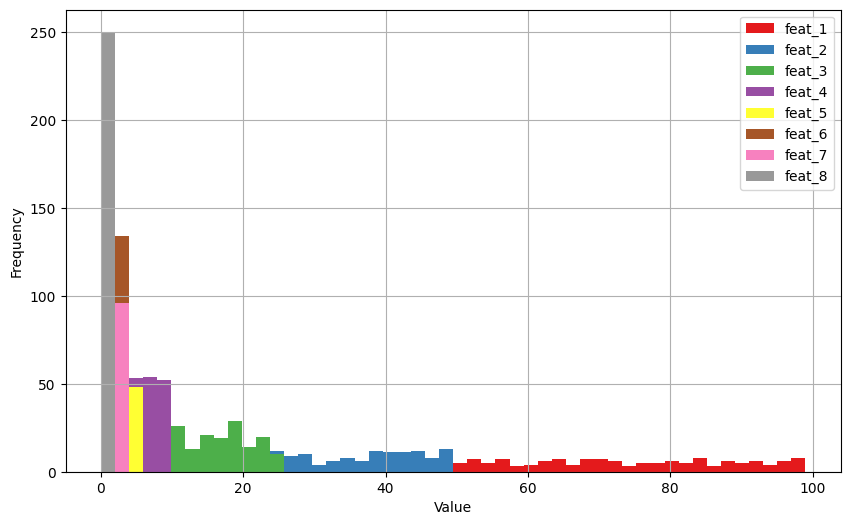

In [ ]:
# Create features containing increasing amount of variance.
# Largest variance is in feature 1, followed by feature 2, etc
feat_1 = np.random.randint(0,100,250)
feat_2 = np.random.randint(0,50,250)
feat_3 = np.random.randint(0,25,250)
feat_4 = np.random.randint(0,10,250)
feat_5 = np.random.randint(0,5,250)
feat_6 = np.random.randint(0,4,250)
feat_7 = np.random.randint(0,3,250)
feat_8 = np.random.randint(0,1,250)

# Create one big dataset.
X = np.c_[feat_1, feat_2, feat_3, feat_4, feat_5, feat_6 ,feat_7, feat_8]
X = pd.DataFrame(data=X, columns=['feat_1','feat_2','feat_3','feat_4','feat_5','feat_6','feat_7','feat_8'])

# Make histogram to visualize the spread of the data points.
fig, ax = plt.subplots(figsize=(10, 6))
X.plot.hist(bins=50, cmap='Set1', ax=ax)
ax.grid(True); ax.set_xlabel('Value')

If we plot the histogram of the 8 features, we can see that feature 1 (grey) has the largest variance, followed by pink (feature 2), and then brow (feature 3), etc. The smallest variance is seen in the red bar (feature 8).

We theorized about what we should expect, and now we can compute the Principal Components with their loadings and the explained variance. For this example, I will initialize pca with n_components=None and thereby not remove any of the PCs. Note that the default is: n_components=0.95 which depicts that the reduction of PCs is up to 95% of the explained variance.

[scatterd] >INFO> Create scatterplot


[pca] >n_components is set to 7
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 1000x600 with 1 Axes>,
 <Axes3D: title={'center': '7 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (75.7% expl.var)', ylabel='PC2 (18.8% expl.var)', zlabel='PC3 (4.47% expl.var)'>)

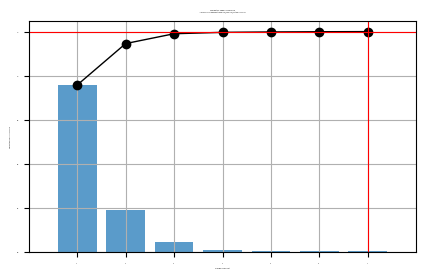

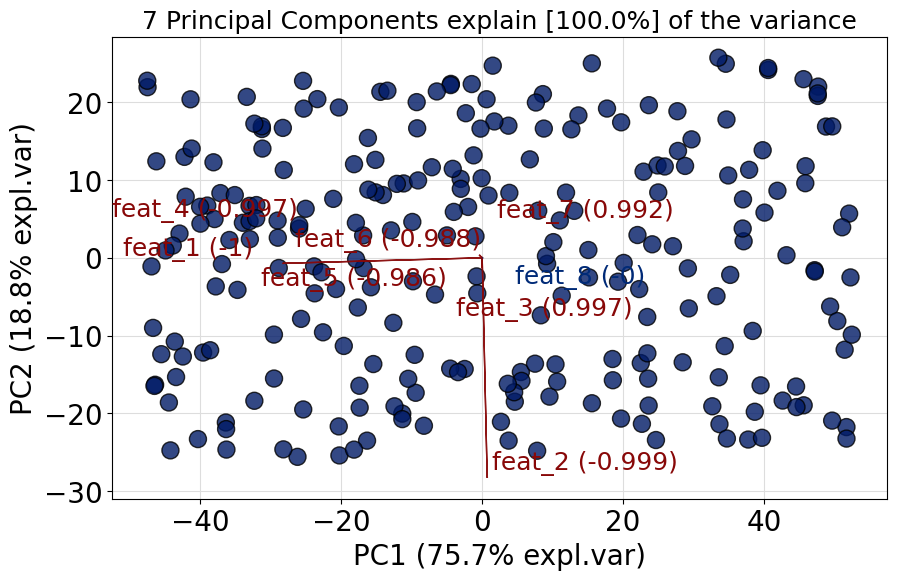

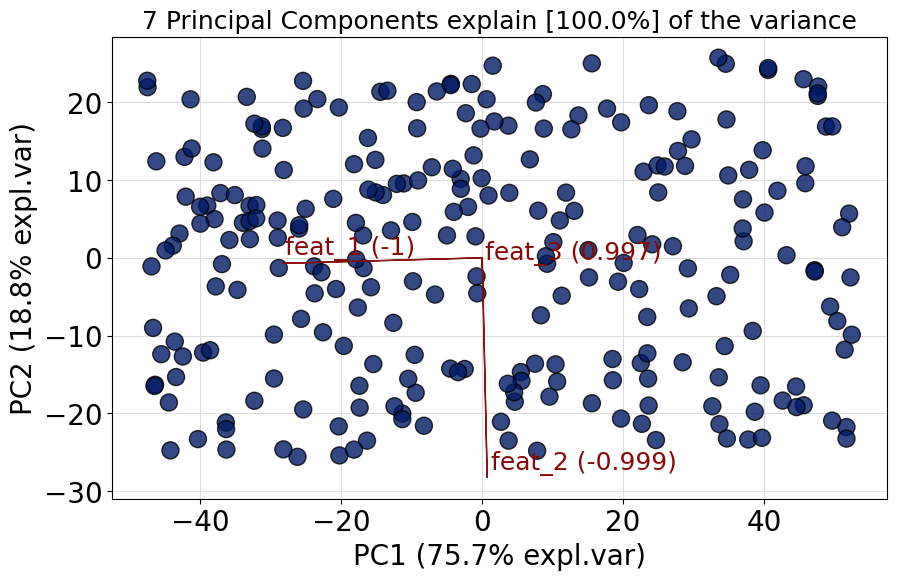

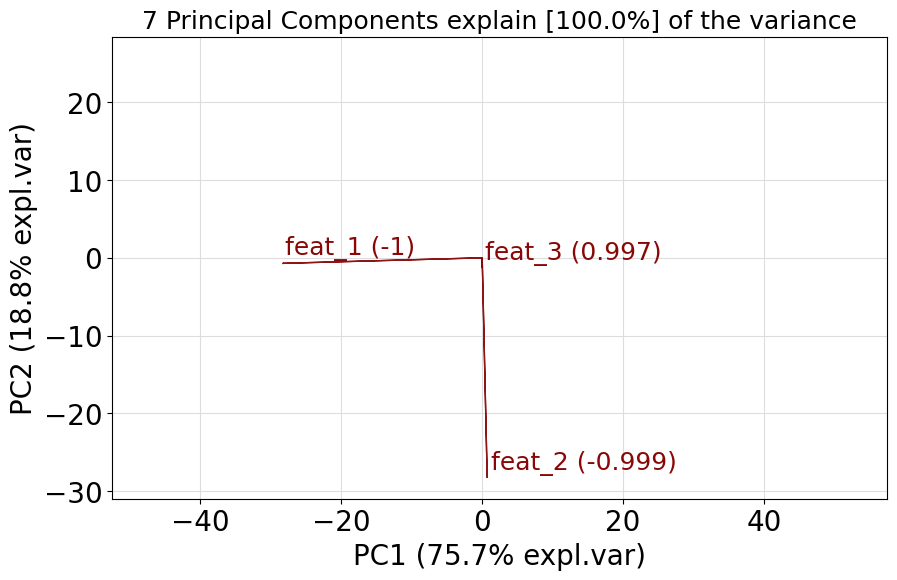

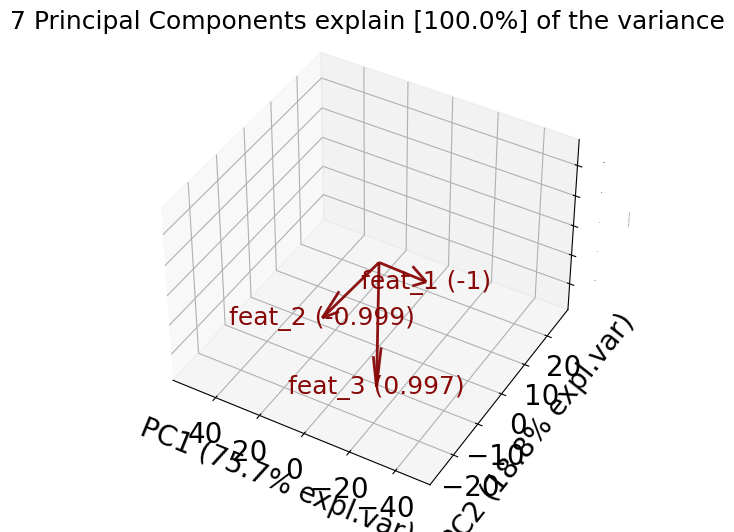

In [ ]:
# Initialize
model = pca(normalize=False, n_components=None)
# Fit transform data
results = model.fit_transform(X)
# Extract the most informative features
results['topfeat']

#     PC feature   loading  type
# 0  PC1  feat_1 -0.997830  best
# 1  PC2  feat_2 -0.997603  best
# 2  PC3  feat_3  0.998457  best
# 3  PC4  feat_4  0.997536  best
# 4  PC5  feat_5 -0.952390  best
# 5  PC6  feat_6 -0.955873  best
# 6  PC7  feat_7 -0.994602  best
# 7  PC1  feat_8 -0.000000  weak

# Plot the explained variance
model.plot(figsize=(5, 3))
# Biplot with the loadings
ax = model.biplot(legend=False, figsize=(10, 6))
# Biplot with the loadings
ax = model.biplot(n_feat=3, legend=False, label=False, figsize=(10, 6))
# Cleaning the biplot by removing the scatter, and looking only at the top 3 features.
ax = model.biplot(n_feat=3, legend=False, label=False, cmap=None, figsize=(10, 6))
# Make plot with 3 dimensions
model.biplot3d(n_feat=3, legend=False, label=False, cmap=None, figsize=(10, 6))

Loadings are visualized by arrows that are under an angle and have a certain length. The angle represents the contribution of a particular feature in the direction of the PCs where it contributes. The length of the arrow depicts the strength of the contribution of the feature in that direction. In a 2D plot, a (near) horizontal arrow (along the x-axis) describes that the feature contributes toward PC1. On the other hand, a vertical arrow describes that a feature contributes the most to the y-axis, and towards PC2. An arrow under a certain angle describes that the particular feature contributes to various PCs in that direction. The length of the arrow depicts the strength or load of the feature in the particular PC. In our example, we expect that feature 1 contributes the most for PC1, and will be almost horizontal and thus will get a value near absolute 1. Feature 2 contributes most to PC2 and will be almost vertical, and will have a value near absolute 1. Feature 3 contributes most to PC3 and will be in the direction of the z-axis., and get a value of near-absolute 1.

We can see that PC1 and PC2 cover over 95% of the variation, and the top 3 PCs cover 99.64% of the total variation. The default setting in the pca library is that only the PCs are kept up to 95% explained variance (thus the top 3 in this case). Note: If the scree plot would result in bars that are equally high, then the top n PCs would not create a very accurate representation of the data. This would have happened if we would have normalized the data at the start (we are working with random data).

The 2-dimensional plot with the samples is depicted in Figure. Here we see that the samples are uniformly distributed. Note that the values range heavily between the x-axis and y-axis.

Let’s focus on only the loadings and remove the scatter from the plot ( by setting the parameter cmap=None). We can clearly see that the largest contributor for the first principal component is feature 1 as the arrow is almost horizontal and has a loading of almost -1 (-0.99). We see similar behavior for feature 2 with PC2, and for feature 3 with PC3 but for PC3 we need to make a 3D plot to see the top 3 features.

Without normalization, the feature with the largest range will have the largest variance and be the most important feature. With normalization, all features would have more or less similar contributions in the case of random data.

## PCA with pca library

In [20]:
# Load dataset
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target
labels = data.feature_names
# Make dataframe
df = pd.DataFrame(data=X, columns=labels, index=y)
print(df)

    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
0     13.20        1.78  2.14               11.2      100.0           2.65   
0     13.16        2.36  2.67               18.6      101.0           2.80   
0     14.37        1.95  2.50               16.8      113.0           3.85   
0     13.24        2.59  2.87               21.0      118.0           2.80   
..      ...         ...   ...                ...        ...            ...   
2     13.71        5.65  2.45               20.5       95.0           1.68   
2     13.40        3.91  2.48               23.0      102.0           1.80   
2     13.27        4.28  2.26               20.0      120.0           1.59   
2     13.17        2.59  2.37               20.0      120.0           1.65   
2     14.13        4.10  2.74               24.5       96.0           2.05   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_in

The range of the features heavily differs and a normalization step is therefore important. The normalization step is a build-in functionality in the pca library that can easily be set by normalize=True. For demonstration purposes, it will set n_components=None to keep all PCs in the model.

[pca] >n_components is set to 12
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,flavanoids,0.422934,best
1,PC2,color_intensity,-0.529996,best
2,PC3,ash,0.626224,best
3,PC4,malic_acid,0.536890,best
4,PC5,magnesium,0.727049,best
5,PC6,malic_acid,-0.536814,best
6,PC7,nonflavanoid_phenols,0.595447,best
7,PC8,hue,-0.436624,best
8,PC9,proline,-0.575786,best
9,PC10,od280/od315_of_diluted_wines,0.523706,best


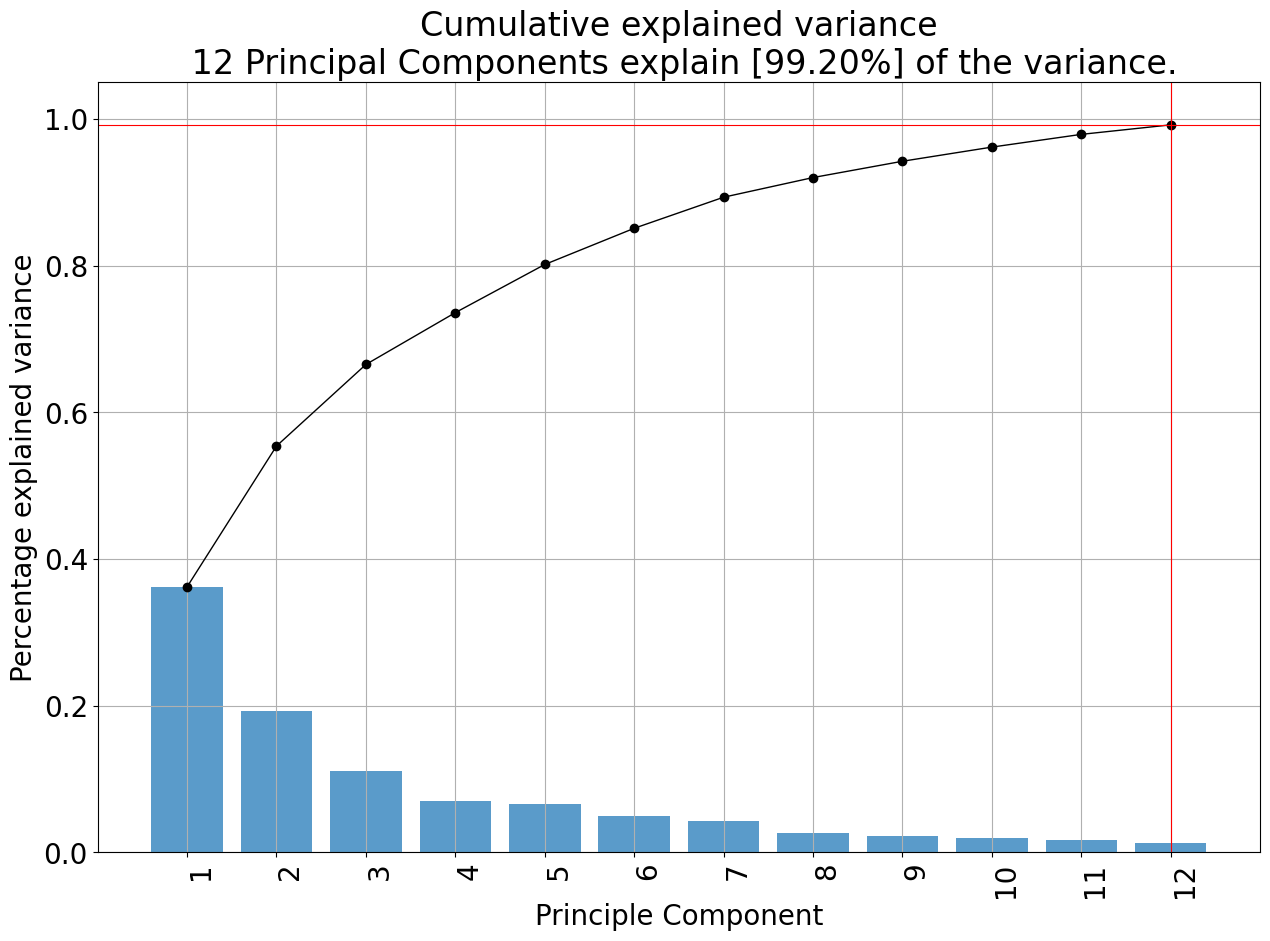

In [21]:
model = pca(normalize=True, n_components=None)

# Fit transform with dataframe
results = model.fit_transform(df)

# Scree plot with explained variance
model.plot()

# Top performing features
model.results['topfeat']


After the fit and transform we can output the top-performing features that are stored in the key “topfeat”. Here we see which variables contribute most to which PCs. With the scree plot, we can examine the variance that is captured across the PCs. In Figure we can see that PC1 and PC2 together cover almost 60% of the variation in the dataset. That's quite OK! We also see that we need 10 PCs to capture >95% of the variation.

f we make the biplot and color the three classes, we can directly notice that the first 2 PCs separate the 3 classes quite well. The first PC captures 36.1% of the variation and the second PC 19.2%. The loadings will now help us to deeper examine how the variables contribute to the PCs, and how classes are separated. The feature that most contribute to the x-axis, and thus for PC1 is flavonoids, whereas, for PC2 (the y-axis), the largest contributor is from the variable color_intensity. The features with a wider angle, such as hue and malic_acid contribute partly to PC1 and PC2.

<ipython-input-24-995b231c6824>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20c', len(markers))


[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot


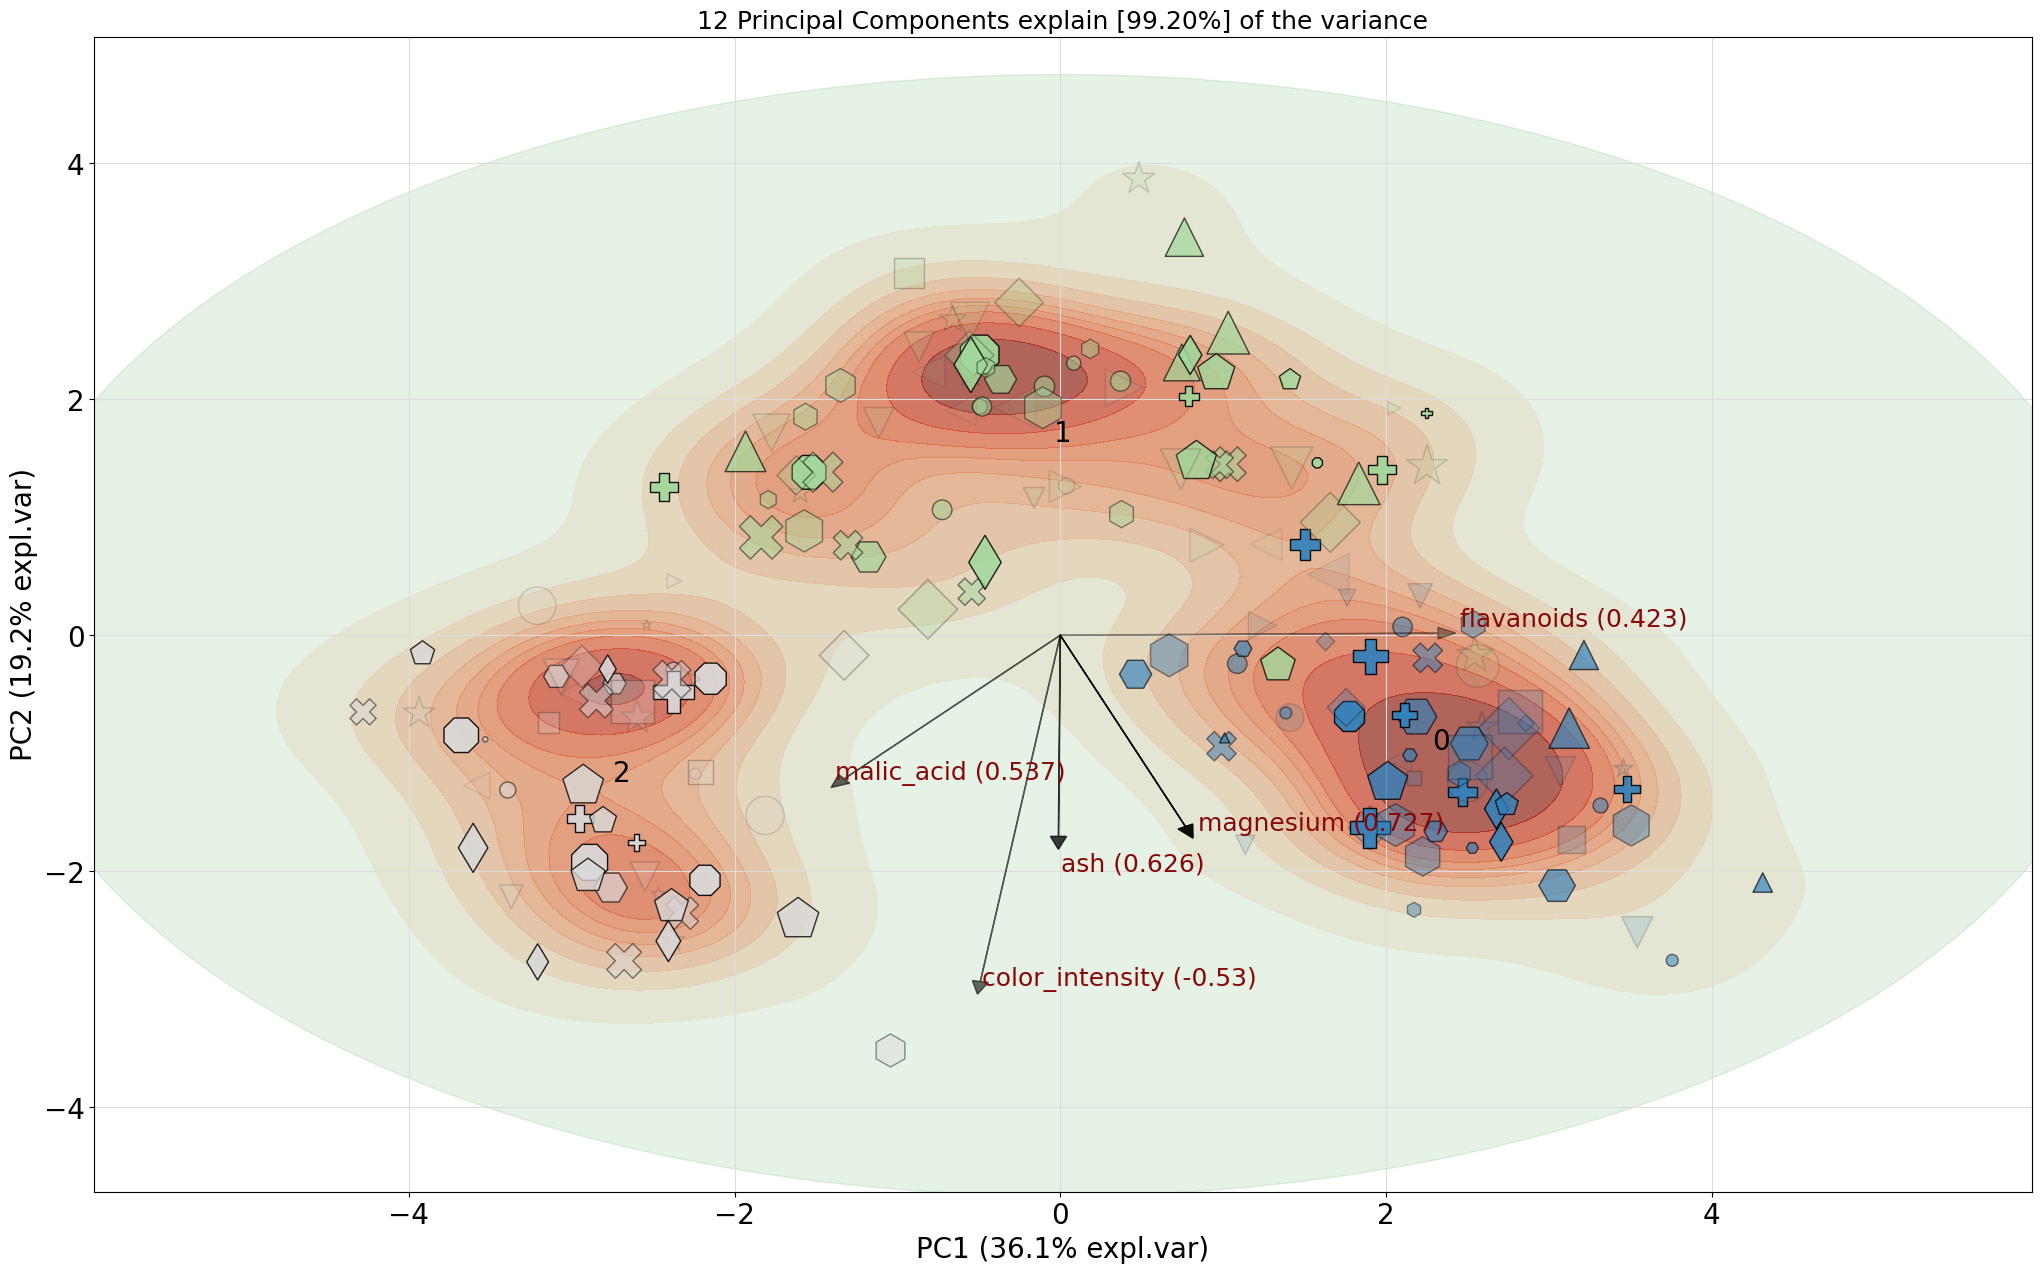

In [24]:
# All available markers
markers = np.array(['.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'])
# Create colors
cmap = plt.cm.get_cmap('tab20c', len(markers))
# Generate random integers
random_integers = np.random.randint(0, len(markers), size=X.shape[0])
# Set Size
size = np.random.randint(50, 1000, size=X.shape[0])
# Set colors
color = cmap.colors[random_integers, 0:3]
# Draw markers
marker = markers[random_integers]
# Set alpha
alpha = np.random.rand(1, X.shape[0])[0][random_integers]

fig, ax = model.biplot(
                        SPE=True,
                        HT2=True,
                        c=color,
                        s=size,
                        marker=marker,
                        alpha=alpha,
                        color_arrow='k',
                        legend=False,
                        n_feat=5,
                        fontsize=20,
                        fontweight='normal',
                        arrowdict={'fontsize': 18},
                        density=True,
                        density_on_top=False,
                        )

Let’s start deeper investigating the flavanoids variable that contributes to PC1. The angle of the flavanoid’s arrow is positive, almost horizontal, and has a score of 0.422. This suggests that some of the variances in the x-axis should come from the flavonoids variable. Or in other words, if we would color the samples using the flavanoids values, we should expect to find samples with low values on the left side and high values on the right side. We can easily investigate this as follows:

/usr/local/lib/python3.10/dist-packages/colourmap/colourmap.py:540: RuntimeWarning: invalid value encountered in divide
  out = (X - x_min) / (x_max - x_min)
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '12 Principal Components explain [99.20%] of the variance'}, xlabel='PC1 (36.1% expl.var)', ylabel='PC2 (19.2% expl.var)'>)

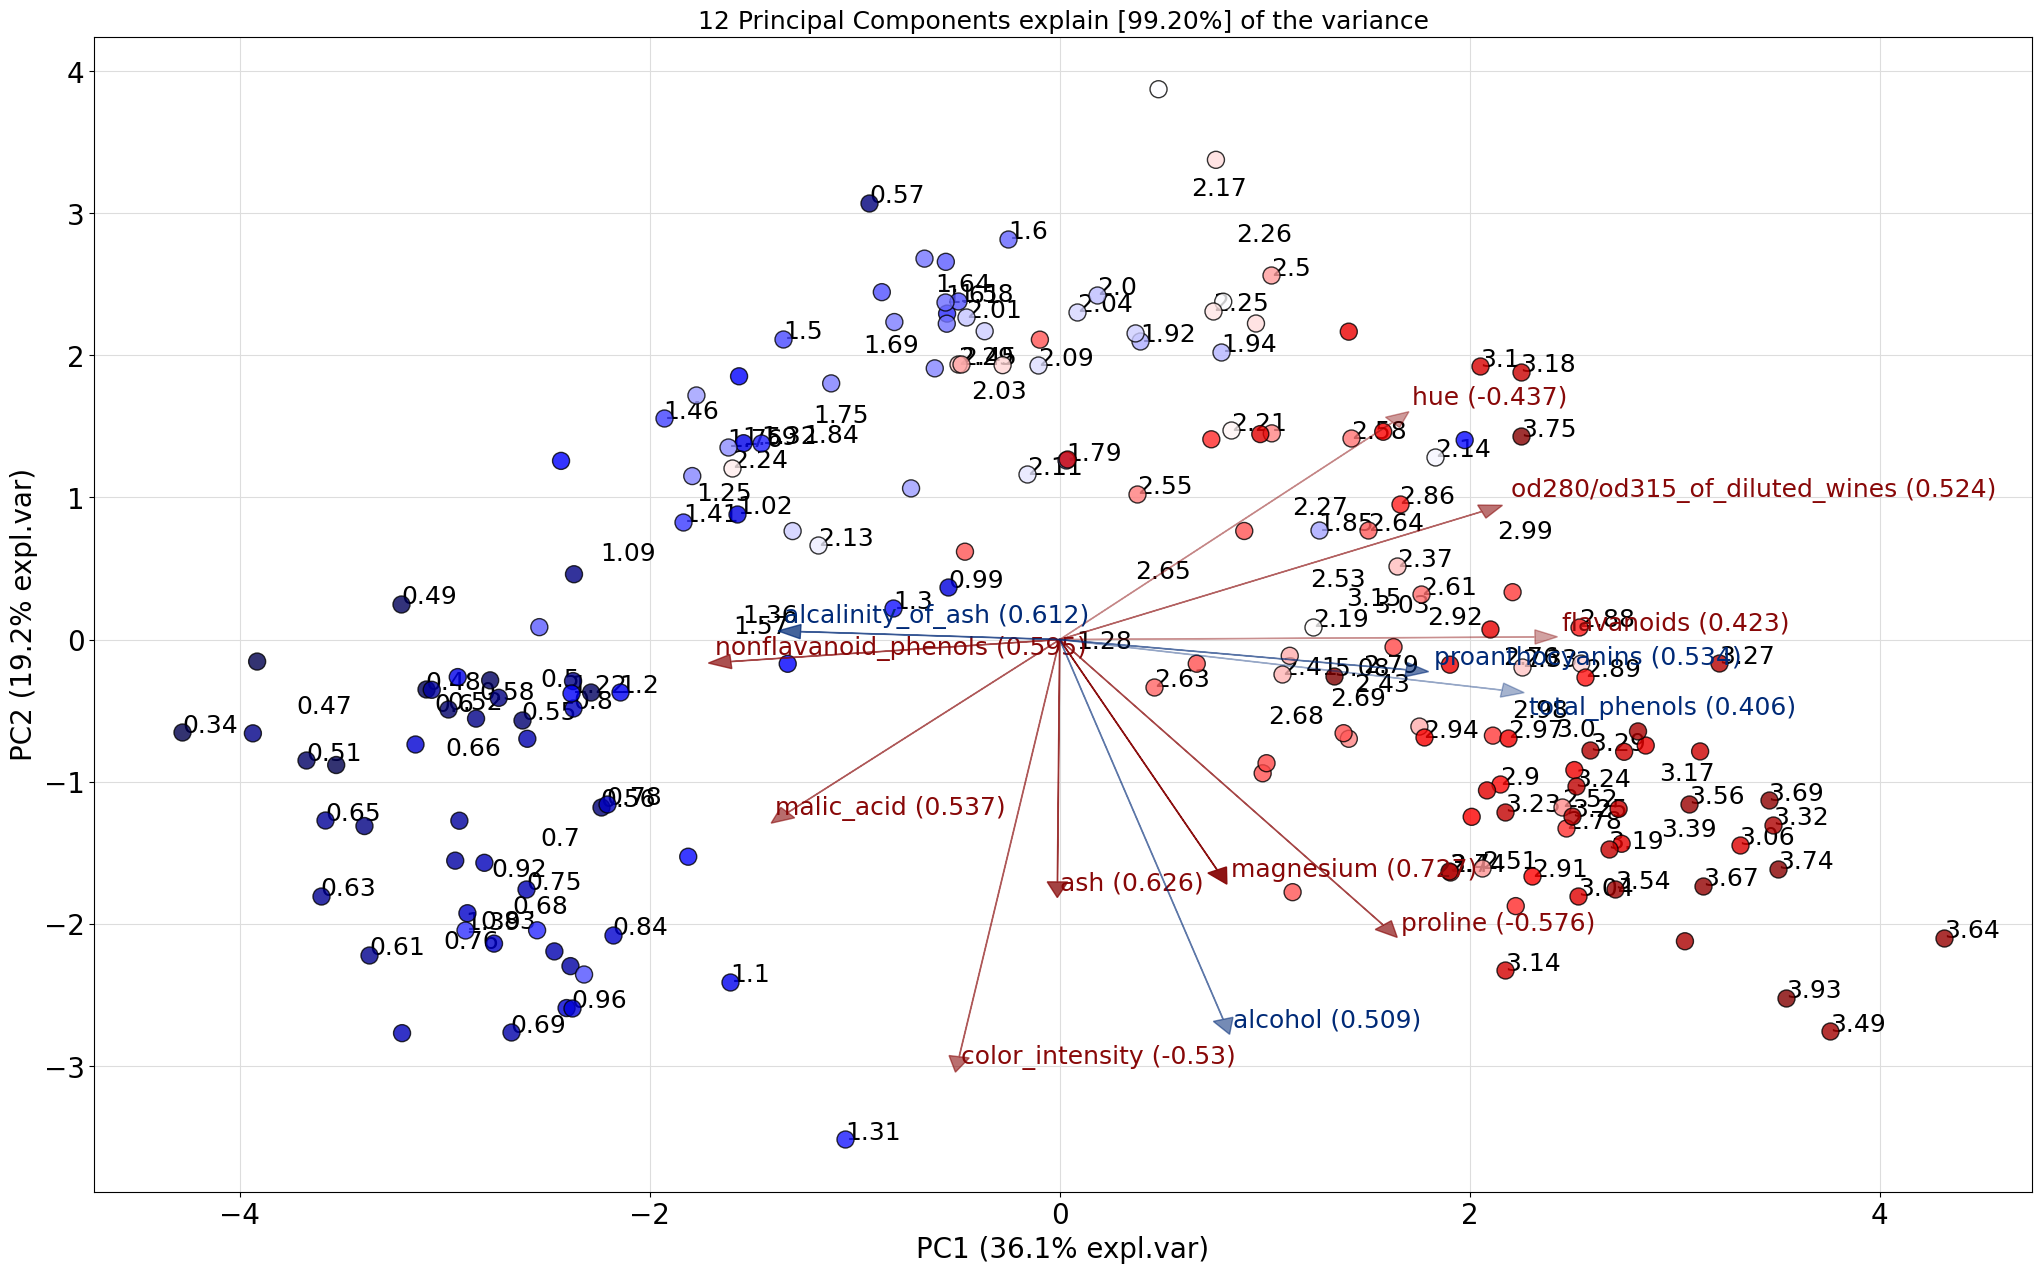

In [17]:
model.biplot(labels=df['flavanoids'].values, legend=False, cmap='seismic')

And indeed, it is nice to see that the samples are colored blue-ish (low value) on the left side and red-ish (high value) on the right side. The loading thus accurately described which feature contributed the most along the x-axis, and the value range.

Positive loadings indicate that a variable and a principal component are positively correlated whereas negative loadings indicate a negative correlation. When loadings are large, (+ or -) it indicates that a variable has a strong effect on that principal component.

Let’s take another one. The best contributor for PC2 is color_intensity. This arrow is downwards and we should expect that the values are thus negatively correlated with PC2. Or in other words, samples with high values for color_intensity are expected at the bottom and low values at the top. If we now color the samples using the color_intensity (Figure 15), it is clear that the variation is indeed along the y-axis.

In [18]:
# 2D plot with samples colored on color_intensity
model.biplot(labels=df['color_intensity'].values, legend=False, cmap='seismic')

# 3D plot with samples colored on color_intensity
model.biplot3d(labels=df['color_intensity'].values, legend=False, label=False, cmap='seismic')

# 2D plot with samples colored on magnesium
model.biplot(labels=df['magnesium'].values, legend=False, cmap='seismic')

# 3D plot with samples colored on magnesium
model.biplot3d(labels=df['magnesium'].values, legend=False, label=False, cmap='seismic')

Output hidden; open in https://colab.research.google.com to view.

## Cómo calcular PCA

Los vectores propios de una matriz se pueden obtener de tres formas diferentes. La mas común es obteniendo los vectores propios de la matriz de convarianza.

In [ ]:
from IPython.display import display, Math, Latex
print('La matriz de convarianza es:')
display(Math(r'\Sigma = \frac{1}{n-1}((X-\overline{x})^T(X-\overline{x}))'))

La matriz de convarianza es:


<IPython.core.display.Math object>

Para este método se debe utilizar la matriz normalizada:

In [ ]:
mean_vect = np.mean(X_scaled, axis=0)
cov_matrix = (X_scaled - mean_vect).T.dot((X_scaled - mean_vect))/(X_scaled.shape[0]-1)
print("La matriz de covarianzas es \n%s"%cov_matrix)

La matriz de covarianzas es 
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.006711         -0.118359           0.877604   
sepal width (cm)           -0.118359          1.006711          -0.431316   
petal length (cm)           0.877604         -0.431316           1.006711   
petal width (cm)            0.823431         -0.368583           0.969328   

                   petal width (cm)  
sepal length (cm)          0.823431  
sepal width (cm)          -0.368583  
petal length (cm)          0.969328  
petal width (cm)           1.006711  


Numpy tiene una función que calcula directamente la matriz de convarianza de la siguiente forma:

In [ ]:
np.cov(X_scaled.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

Como se puede observar, el resutlado de la matriz de convarianza es igual.  
Finalmente, calculamos los valores propios y vectores propios de dicha matriz de covarianza. Los componentes principales corresponden a los vectores propios.

In [ ]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Tambien es posible utlizar la matriz de correlación para obtener los componentes principales. En este caso corresponden a los vectores propios de la matriz de correlación. La matriz de covarianza de la matriz normalizada es igual a la matriz de correlación.

In [ ]:
corr_matrix = np.corrcoef(X.T)
eig_vals_corr, eig_vectors_corr = np.linalg.eig(corr_matrix)
print("Valores propios \n%s"%eig_vals_corr)
print("Vectores propios \n%s"%eig_vectors_corr)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Finalmente, tambien se utiliza el método de *Singular Value Decomposition*, donde los componentes principales corresponden a la matriz *U*.

In [ ]:
u,s,v = np.linalg.svd(X_scaled.T)
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

## PCA con *Scikitlearn*

Se implementa el análisis PCA con la librería sklearn de Python.

In [ ]:
n = len(X[1])  # número de features
pca = PCA(n_components=n).fit(X_scaled)
print(pca.components_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]


Se puede graficar cuanto aporta a la varianza cada componente generado.

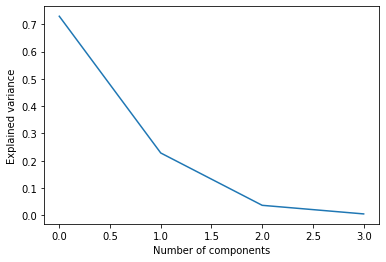

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Graficamos el acumulado de varianza explicada en las nuevas dimensiones.

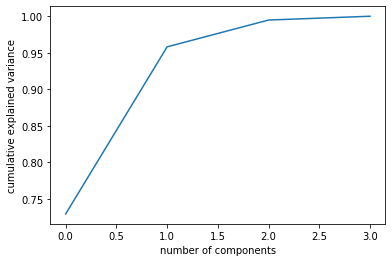

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Para transformar las observaciones en el nuevo espacio dimencional se utiliza la siguiente función:

In [ ]:
pca_samples = pca.transform(X_scaled)

Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de Python. 0,1 denota el componente principal 1 y 2 (PC1 y PC2). Ademas se grafican las observaciones por cada clase en el nuevo espacio dimensional.

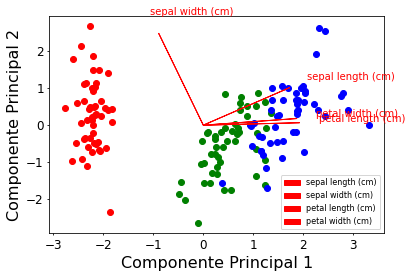

In [ ]:
xvector = pca.components_[0]
yvector = pca.components_[1]

xs = pca.transform(X_scaled)[:,0]
ys = pca.transform(X_scaled)[:,1]

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(X_scaled.columns.values)[i], color='r')

for c, i, iris.target_names in zip("rgb", [0, 1, 2], iris.feature_names):
   plt.scatter(pca_samples[y==i,0], pca_samples[y==i,1], c=c)
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(iris.feature_names, fontsize=8)
plt.show()

Se puede construir una tabla donde se observe para cada variable su aporte en cada componente. Por lo tanto las variables que mas le aporten a los componentes principales que tienen la mayor varianza, pues serán las mejores variables.

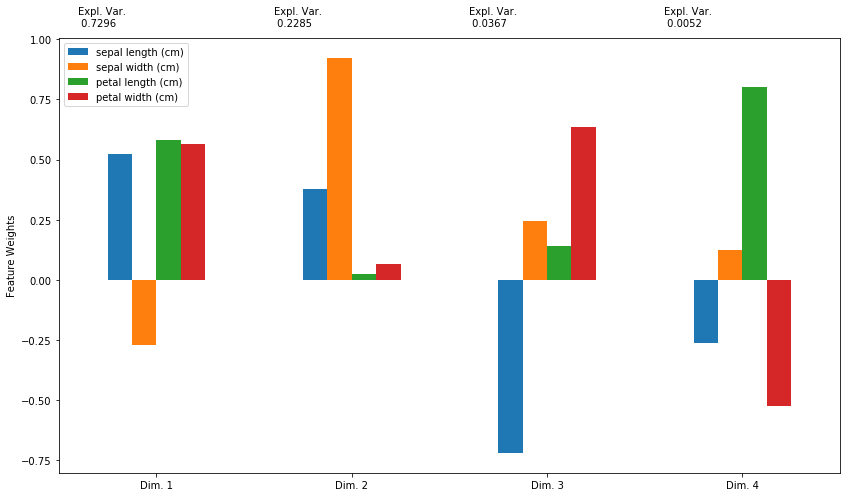

In [ ]:
def pca_results(X_scaled, pca):

    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]

    components = pd.DataFrame(np.round(pca.components_, 4), columns = X_scaled.keys())
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(X_scaled, pca)

Esta tabla también se resume en esta otra tabla.

In [ ]:
print(pca_results.cumsum())

        Explained Variance  sepal length (cm)  sepal width (cm)  \
Dim. 1              0.7296             0.5211           -0.2693   
Dim. 2              0.9581             0.8985            0.6540   
Dim. 3              0.9948             0.1789            0.8984   
Dim. 4              1.0000            -0.0824            1.0219   

        petal length (cm)  petal width (cm)  
Dim. 1             0.5804            0.5649  
Dim. 2             0.6049            0.6318  
Dim. 3             0.7470            1.2661  
Dim. 4             1.5484            0.7425  


## Ejemplo

<ipython-input-19-742dd7a475a9>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20c', len(markers))
[scatterd] >INFO> Add density layer


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [30] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [27] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[27]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


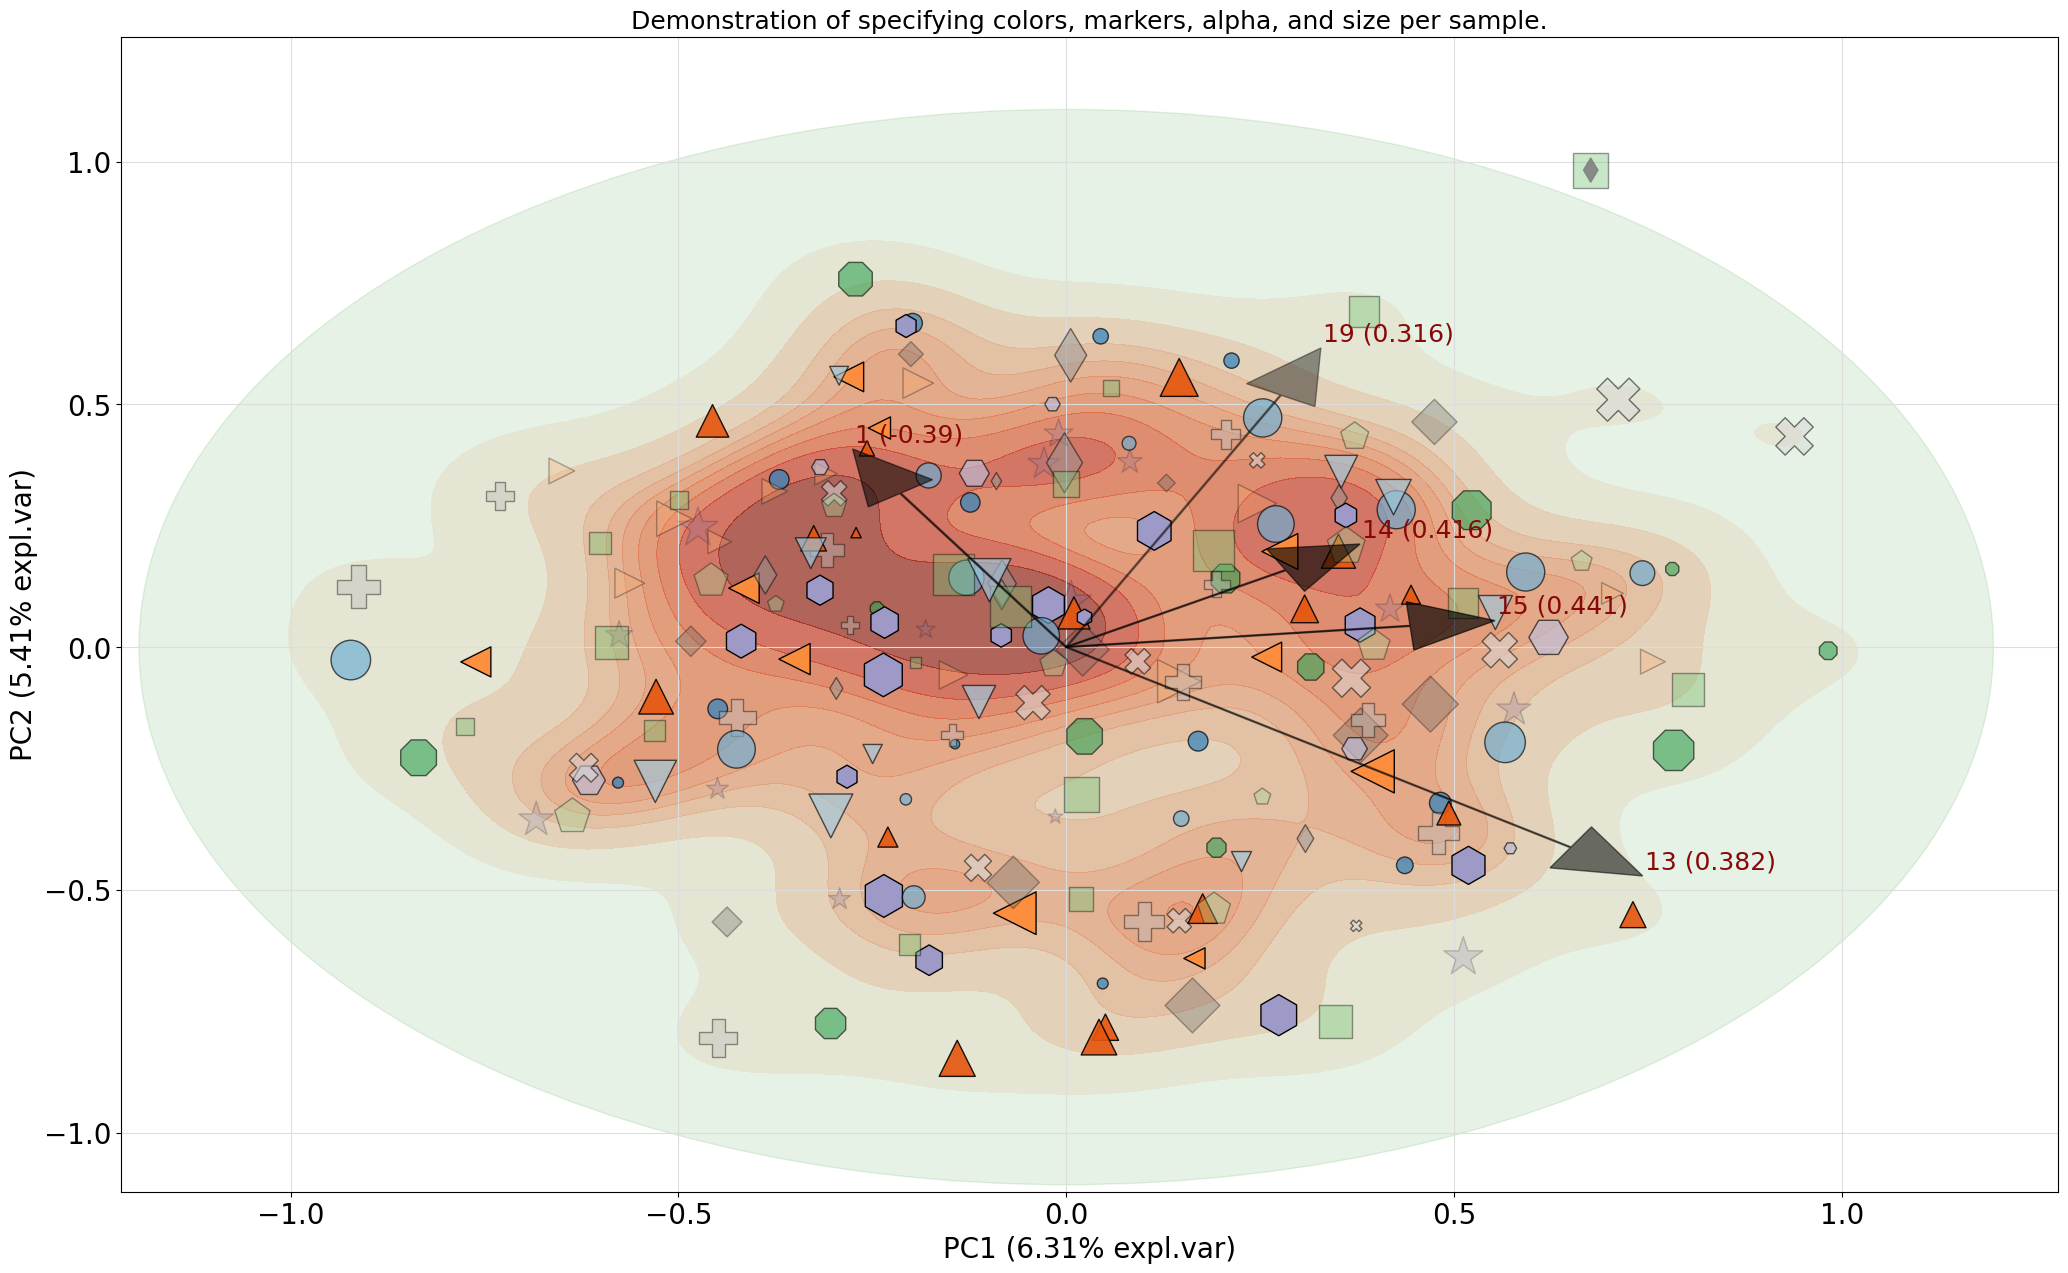

In [19]:
import matplotlib.colors as mcolors
from sklearn.datasets import make_friedman1
from pca import pca

# Make data set
X, _ = make_friedman1(n_samples=200, n_features=30, random_state=0)

# All available markers
markers = np.array(['.', 'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'])
# Create colors
cmap = plt.cm.get_cmap('tab20c', len(markers))
# Generate random integers
random_integers = np.random.randint(0, len(markers), size=X.shape[0])
# Draw markers
marker = markers[random_integers]
# Set colors
color = cmap.colors[random_integers, 0:3]
# Set Size
size = np.random.randint(50, 1000, size=X.shape[0])
# Set alpha
alpha = np.random.rand(1, X.shape[0])[0][random_integers]

# Init
model = pca(verbose=3)
# Fit
model.fit_transform(X)
# Make plot with blue arrows and text
fig, ax = model.biplot(
                        SPE=True,
                        HT2=True,
                        c=color,
                        s=size,
                        marker=marker,
                        alpha=alpha,
                        color_arrow='k',
                        n_feat=5,
                        fontsize=20,
                        fontweight='normal',
                        arrowdict={'fontsize': 18},
                        density=True,
                        density_on_top=False,
                        )

##More dimensionality reduction methods
**PCA**: here the data (which is potentially correlated) is reframed into uncorrelated principal components, which contain decreasing amounts of information as measured by variance. Using this method to visualize only the first initial components (describing most of the variance) is inherently a method that captures primarily the global structure of the data.

**t-SNE**: here gradient descent is used to find a low dimensional embedding in which a relative distance between point i and j match that in the original high-dimensional space, under the control of a not very intuitive perplexity parameter that determines the standard deviation of the conditional distributions used for the relative distance calculations in high-dimensional space. This method primarily focuses on local structure, in that it puts focus on nearest neighbors in the relative distance calculations.

**UMAP**: here a weighted graph of nearest neighbors is constructed with vertices being observations / data points, and stochastic gradient descent is then used to optimize a lower-dimensional graph to be as structurally similar as possible to the high-dimensional one. UMAP has a lot of advantages over t-SNE in that it better preserves global structure, is faster, and has slightly more interpretable hyper parameters, but at its core it uses distances between nearest neighbors in the construction of the graph, and as such focuses on local structure.

**TriMAP**: here triplets (sets of three observations) are created predominantly from nearest neighbors, but with a fraction of the triplets also containing one or two randomly sampled points. The algorithm then tries to find a lower dimensional embedding using batch gradient descent, which preserves the ordering of distances of the triplets. Theoretically this method manages to include both local and global structure, but in practice it is typically found to be prone to struggle with local structure.

**PaCMAP**: This mnethod optimizes the low-dimensional graph in a way to conserve both local and global graph structure, again showing how most algorithms are near-sighted (i.e. focus on local structure)

In [ ]:
!pip install trimap==1.0.15 umap-learn==0.5.1 pacmap==0.3

In [ ]:
import time
import trimap
import umap
import pacmap
from sklearn.manifold import TSNE

# Algorithms to test
algorithms = {
    't-SNE': TSNE(),
    'UMAP': umap.UMAP(),
    'TriMAP': trimap.TRIMAP(),
    'PaCMAP': pacmap.PaCMAP()
}

# Create embeddings for each algorithm & save fitting time
results = {}
for name, algorithm in algorithms.items():

    # Calculate embeddings
    embedding = algorithm.fit_transform(X)

    # Store results & runtime
    results[name] = {
        'embedding': pd.DataFrame(embedding, columns=['x', 'y']),
    }

TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance=euclidean, lr=1000.0, n_iters=400, weight_adj=500.0, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


running TriMap on 150 points with dimension 4
pre-processing
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 5.531, Violated triplets: 0.0670
Iteration:  200, Loss: 5.425, Violated triplets: 0.0658
Iteration:  300, Loss: 5.387, Violated triplets: 0.0653
Iteration:  400, Loss: 5.339, Violated triplets: 0.0647
Elapsed time: 0:00:00.197327


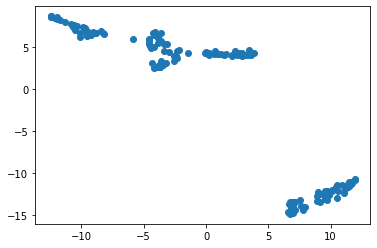

In [ ]:
PaCMAP=results["PaCMAP"]["embedding"]
plt.scatter(PaCMAP.x, PaCMAP.y)

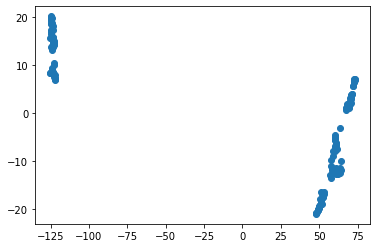

In [ ]:
TriMAP=results["TriMAP"]["embedding"]
plt.scatter(TriMAP.x, TriMAP.y)

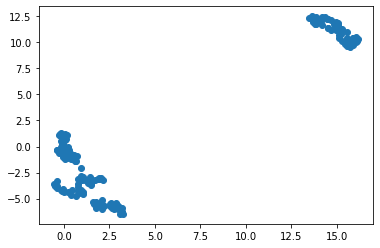

In [ ]:
UMAP=results["UMAP"]["embedding"]
plt.scatter(UMAP.x, UMAP.y)

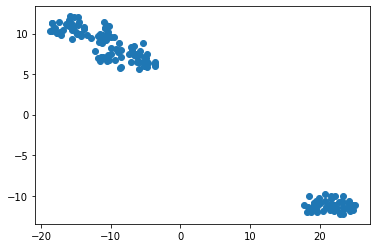

In [ ]:
tSNE=results["t-SNE"]["embedding"]
plt.scatter(tSNE.x, tSNE.y)